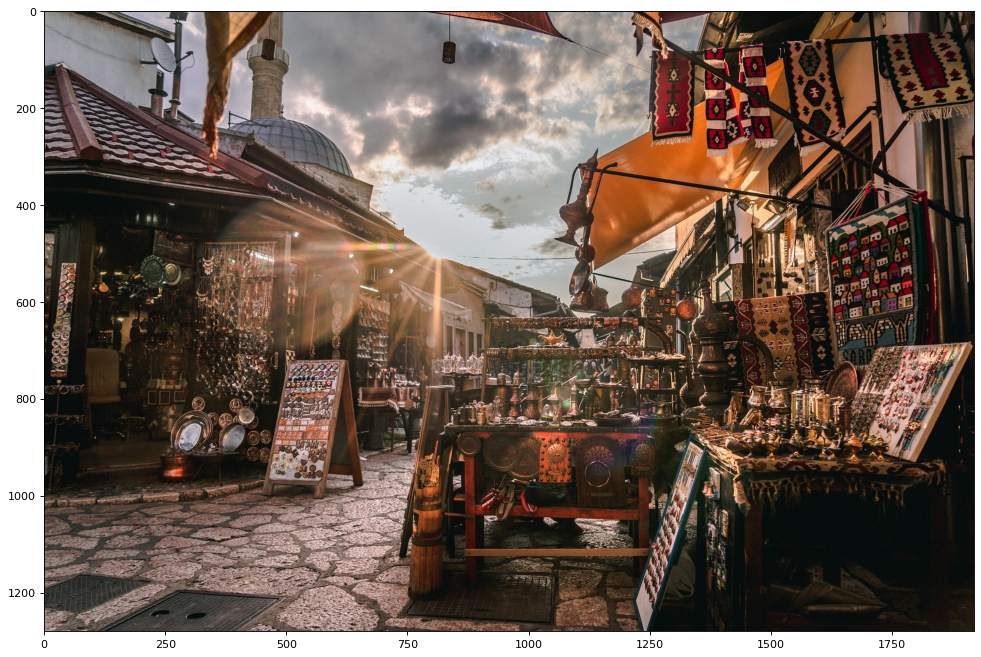

In [1]:
import cv2
from matplotlib import pyplot as plt

I = cv2.imread('sarajevo.jpg')[:, :, ::-1]
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(I)
plt.show()

In [2]:
I = cv2.imread('sarajevo.jpg')[:, :, ::-1]
print(I.shape)

(1280, 1920, 3)


(640, 2, 960, 2, 3)


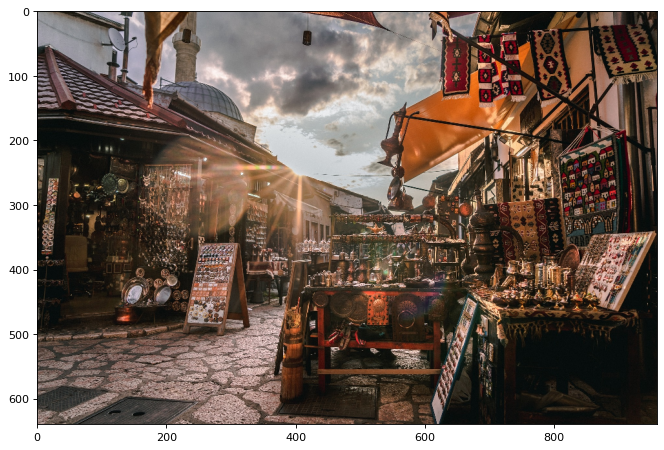

In [3]:
I_ = I.reshape(I.shape[0] // 2, 2, I.shape[1] // 2, 2, -1)
print(I_.shape)

plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(I_[:, 0, :, 0])
plt.show()

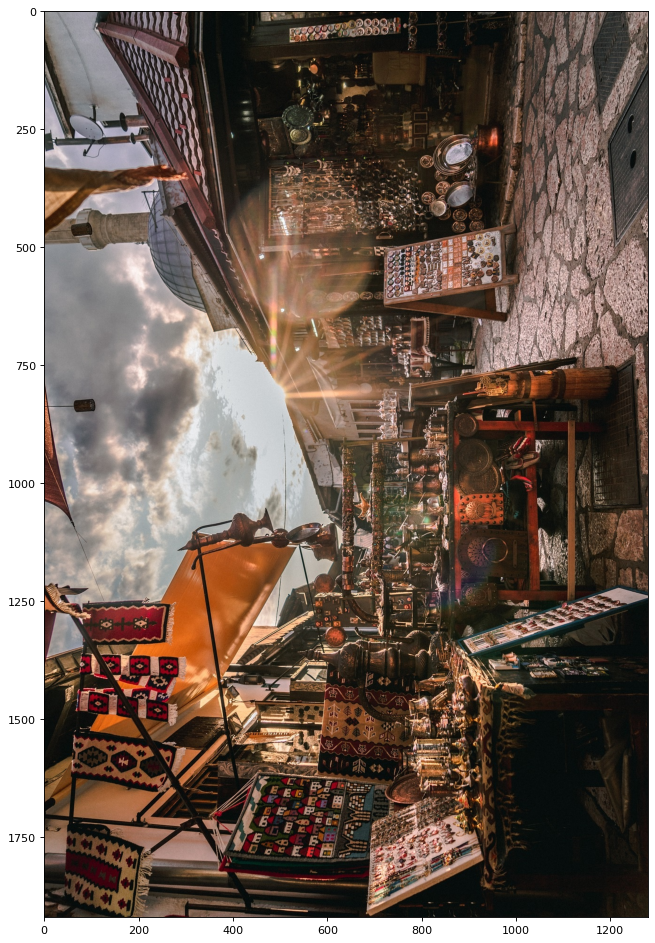

In [6]:
I_ = cv2.transpose(I, (1, 0, 2))

plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(I_)
plt.show()

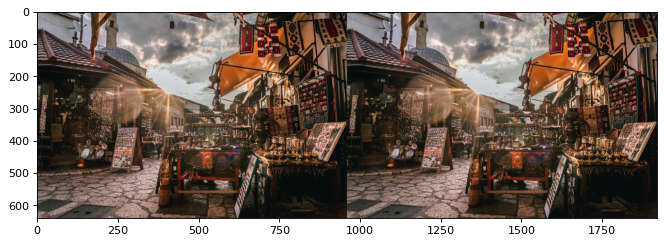

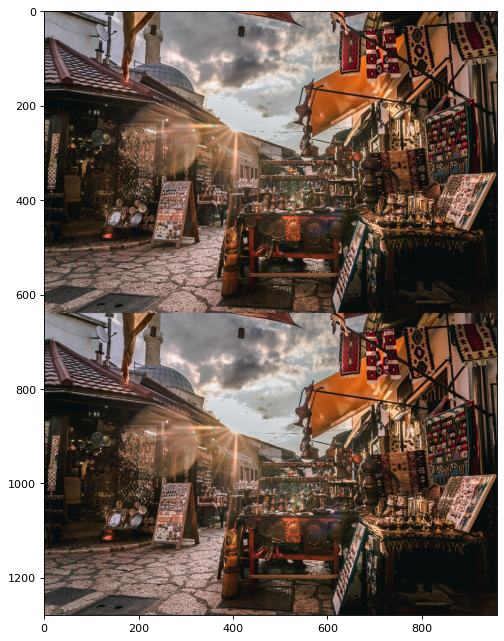

In [10]:
import numpy as np
I = cv2.imread('sarajevo.jpg')[:, :, ::-1]

I_ = I.reshape(I.shape[0] // 2, 2, I.shape[1] // 2, 2, -1)

Ih = np.hstack((I_[:, 0, :, 0], I_[:, 0, :, 1]))
Iv = np.vstack((I_[:, 0, :, 0], I_[:, 1, :, 0]))

plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(Ih)
plt.show()

plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(Iv)
plt.show()

I0 (1280, 1920, 3)
I1 (640, 960, 3)
I2 (3686400,)
I3 (640, 960, 3, 2)
I4 (640, 2, 960, 3)
I5 (1280, 960, 3)


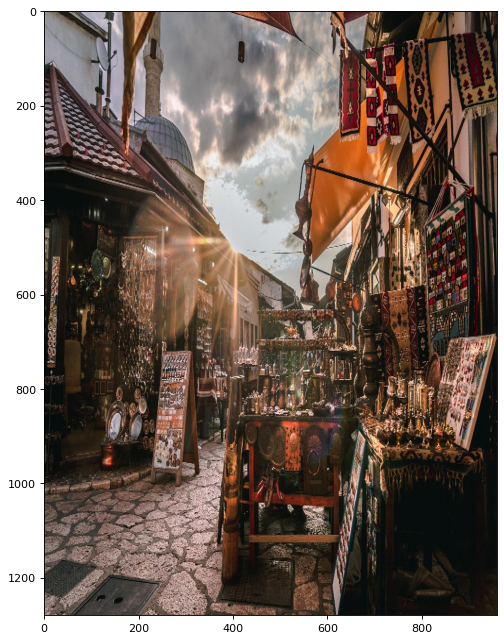

In [12]:
I0 = cv2.imread('sarajevo.jpg')[:, :, ::-1]    
I1 = I.reshape(I.shape[0] // 2, 2, I.shape[1] // 2, 2, -1)[:, 0, :, 0]  

I2 = np.repeat(I1, 2)  
I3 = I2.reshape(I1.shape[0], I1.shape[1], I1.shape[2], -1)
I4 = np.transpose(I3, (0, 3, 1, 2)) 
I5 = I4.reshape(-1, I1.shape[1], I1.shape[2]) 

print('I0', I0.shape)
print('I1', I1.shape)
print('I2', I2.shape)
print('I3', I3.shape)
print('I4', I4.shape)
print('I5', I5.shape)

plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(I5)
plt.show()


In [19]:
def smooth(I):
    
    J = I.copy()
    
    J[1:-1] = (J[1:-1] // 2 + J[:-2] // 4 + J[2:] // 4)
    J[:, 1:-1] = (J[:, 1:-1] // 2 + J[:, :-2] // 4 + J[:, 2:] // 4)
    
    return J
    I_noise = cv2.imread('sarajevo_noise.jpg')
    I_denoise_1 = smooth(I_noise)
    I_denoise_2 = smooth(I_denoise_1)
    I_denoise_3 = smooth(I_denoise_2)

    cv2.imwrite('sarajevo_denoise_1.jpg', I_denoise_1)
    cv2.imwrite('sarajevo_denoise_2.jpg', I_denoise_2)
    cv2.imwrite('sarajevo_denoise_3.jpg', I_denoise_3)


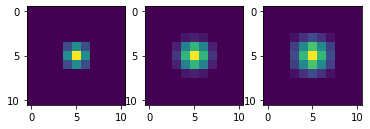

In [18]:
M = np.zeros((11, 11))
M[5, 5] = 255

M1 = smooth(M)
M2 = smooth(M1)
M3 = smooth(M2)

plt.subplot(1, 3, 1)
plt.imshow(M1)
plt.subplot(1, 3, 2)
plt.imshow(M2)
plt.subplot(1, 3, 3)
plt.imshow(M3)
plt.show()